### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import dtale
import matplotlib.pyplot as plt

### Read Data

In [2]:
city_dict = pd.read_json("city_dict.json",typ='series')
city_codes = pd.DataFrame({'code':city_dict.index, 'city':city_dict.values})
discount_features = pd.read_csv("discount_features.csv", sep=',', header=0)
foot_fall = pd.read_csv("foot_fall.csv", sep=',', header=0)
sample_submission = pd.read_csv("sample_submission.csv", sep=',', header=0)
test_data = pd.read_csv("test_data.csv", sep=',', header=0)
train_data = pd.read_csv("train_data.csv", sep=',', header=0)

## Understand Data

### What's the shape ?

In [3]:
dfs = {
    "train_data" : train_data,
    "test_data" : test_data,
    "city_codes" : city_codes,
    "discount_features" : discount_features,
    "foot_fall" : foot_fall
    }

line = "▒"*20

for name,df in dfs.items():
    print('{0} {1}.shape {2}'.format(line,name,line))
    display(df.shape)



▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ train_data.shape ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


(22624345, 6)

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ test_data.shape ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


(773535, 6)

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ city_codes.shape ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


(10, 2)

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ discount_features.shape ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


(17277949, 4)

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ foot_fall.shape ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


(10, 1268)

### What are the features ?

In [4]:
for name,df in dfs.items():
    print('{0} {1}.head(3) {2}'.format(line,name,line))
    display(df.head(3))

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ train_data.head(3) ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


,year,month,day,city,medicine,sales
0,2015,1,2,1,1,24.0
1,2015,1,2,1,2,144.0
2,2015,1,2,1,3,84.0


▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ test_data.head(3) ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


,id,year,month,day,city,medicine
0,1,2018,7,1,1,1292
1,2,2018,7,1,1,1
2,3,2018,7,1,1,2


▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ city_codes.head(3) ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


,code,city
0,4,Mumbai
1,5,Delhi
2,7,Bangalore


▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ discount_features.head(3) ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


,date,city,medicine,discounted
0,2016-04-01,1,1,0
1,2016-04-01,1,2,0
2,2016-04-01,1,3,0


▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ foot_fall.head(3) ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


,city,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
0,Ahmedabad,9384.0,6808.0,8064.0,10248.0,11180.0,6876.0,6436.0,7104.0,5924.0,...,9624.0,10476.0,9584.0,11940.0,13040.0,12144.0,10164.0,9784.0,10472.0,10040.0
1,Bangalore,16644.0,14640.0,15660.0,19056.0,19740.0,14280.0,12740.0,13480.0,11928.0,...,12412.0,13392.0,11948.0,13860.0,16384.0,16192.0,12388.0,12124.0,13412.0,12172.0
2,Chennai,19544.0,13752.0,13736.0,19740.0,21604.0,12820.0,12244.0,11956.0,10508.0,...,10420.0,11044.0,10320.0,11988.0,15248.0,15188.0,10596.0,9716.0,10776.0,10336.0


### What are the data types ?

In [5]:
for name,df in dfs.items():
    print('{0} {1}.dtypes {2}'.format(line,name,line))
    display(df.dtypes)

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ train_data.dtypes ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


year          int64
month         int64
day           int64
city          int64
medicine      int64
sales       float64
dtype: object

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ test_data.dtypes ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


id          int64
year        int64
month       int64
day         int64
city        int64
medicine    int64
dtype: object

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ city_codes.dtypes ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


code     int64
city    object
dtype: object

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ discount_features.dtypes ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


date          object
city           int64
medicine       int64
discounted     int64
dtype: object

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ foot_fall.dtypes ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


city           object
2015-01-02    float64
2015-01-03    float64
2015-01-04    float64
2015-01-05    float64
               ...   
2018-06-26    float64
2018-06-27    float64
2018-06-28    float64
2018-06-29    float64
2018-06-30    float64
Length: 1268, dtype: object

### Data type conversion

In [6]:
test_data.columns

Index(['id', 'year', 'month', 'day', 'city', 'medicine'], dtype='object')

In [7]:
for col in ['city', 'medicine']:
    train_data[col] = train_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')

In [8]:
for col in ['city', 'medicine']:
    discount_features[col] = discount_features[col].astype('category')

discount_features['date'] = discount_features['date'].astype('datetime64')

In [9]:
for col in ['code', 'city']:
    city_codes[col] = city_codes[col].astype('category')

In [10]:
foot_fall['city'] = foot_fall['city'].astype('category')

### Check NA and Null Values

In [11]:
for name,df in dfs.items():
    display(df.isna().sum())
    display(df.isnull().sum())    

year        0
month       0
day         0
city        0
medicine    0
sales       0
dtype: int64

year        0
month       0
day         0
city        0
medicine    0
sales       0
dtype: int64

id          0
year        0
month       0
day         0
city        0
medicine    0
dtype: int64

id          0
year        0
month       0
day         0
city        0
medicine    0
dtype: int64

code    0
city    0
dtype: int64

code    0
city    0
dtype: int64

date          0
city          0
medicine      0
discounted    0
dtype: int64

date          0
city          0
medicine      0
discounted    0
dtype: int64

city          0
2015-01-02    0
2015-01-03    0
2015-01-04    0
2015-01-05    0
             ..
2018-06-26    0
2018-06-27    0
2018-06-28    0
2018-06-29    0
2018-06-30    0
Length: 1268, dtype: int64

city          0
2015-01-02    0
2015-01-03    0
2015-01-04    0
2015-01-05    0
             ..
2018-06-26    0
2018-06-27    0
2018-06-28    0
2018-06-29    0
2018-06-30    0
Length: 1268, dtype: int64

### Feature Engineering

In [12]:
train_data["date"] = pd.to_datetime(train_data[["year", "month", "day"]])
test_data["date"] = pd.to_datetime(test_data[["year", "month", "day"]])
test_data.drop(["year", "month", "day"],axis=1,inplace=True)
train_data.drop(["year", "month", "day"],axis=1,inplace=True)

### Univariate Analysis

In [13]:
train_data.describe(include=np.number)

,sales
count,2.262434e+07
mean,5.166032e+01
std,1.100297e+02
min,-9.948000e+03
25%,1.200000e+01
50%,2.800000e+01
75%,5.600000e+01
max,8.299200e+04


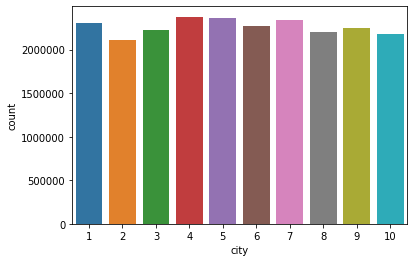

In [14]:
sns.countplot(train_data['city'])

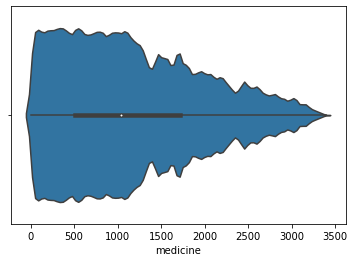

In [15]:
sns.violinplot(train_data['medicine'])

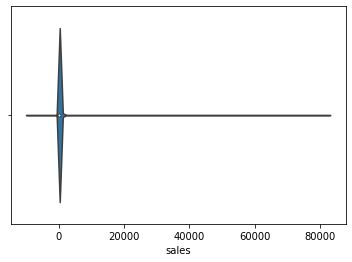

In [16]:
sns.violinplot(train_data['sales'])

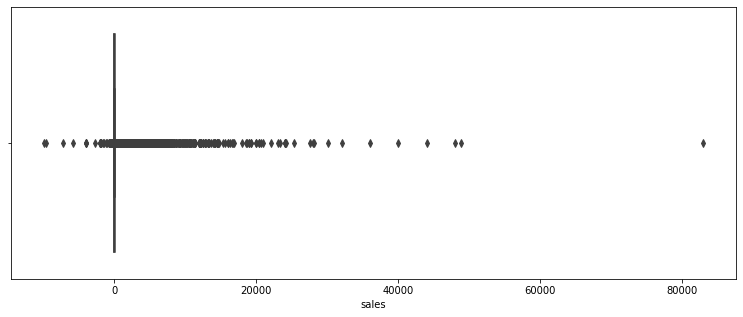

In [17]:
plt.figure(figsize=(13, 5))
sns.boxplot(train_data['sales'])

### Conclusion

* Possible pressence of outlier values in sales values

### Bivariate Analysis

In [39]:
tdmc1 = train_data[(train_data["date"] == '2018-01-30') & (train_data["sales"] < 400)]
tdmc1.shape

(25401, 4)

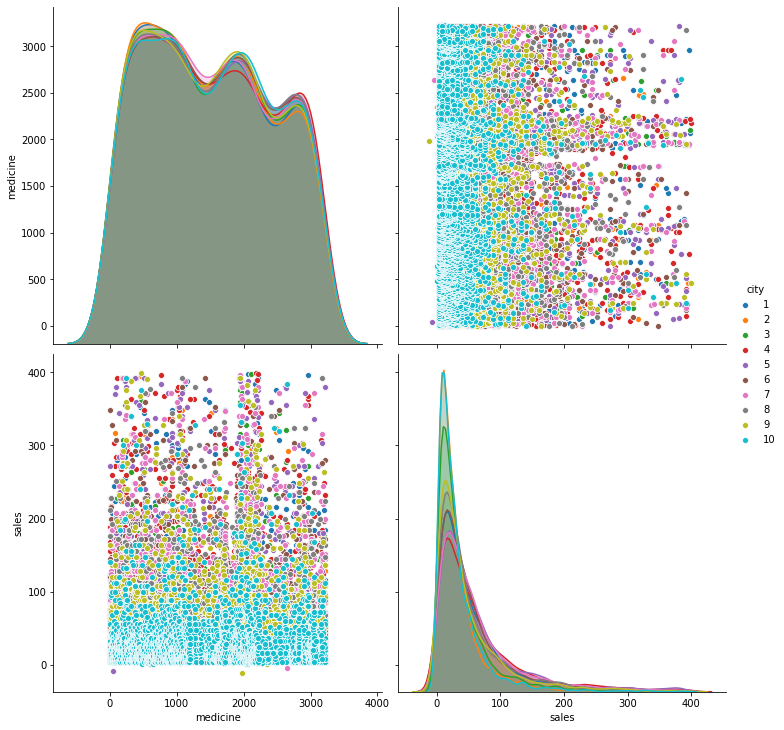

In [40]:
sns.pairplot(tdmc1,hue="city",height=5)

In [21]:
dttd = dtale.show(train_data)

In [22]:
dttd.open_browser()

#### For medicine 100 and city 1

![](./dtale/dt1.png)

![](./dtale/dt2.png)

#### For medicine 100 and city 2

![](./dtale/dt3.png)

#### For medicine 200 and city 1

![](./dtale/dt4.png)

![](./dtale/dt5.png)

#### For medicine 200 and city 2

![](./dtale/dt6.png)

### Conclusion

* We notice that we have time series data of sales for each medicine and for each city
* Different medicine and cities have different levels of tends and randomness in the sales values
* We could treat each case a different forecasting model or
* We need to find out if there are any trend in cities or in the medicine over time
* We could aggregate or group sales values by cities or medicine whichever is appropriate on further analysis